# What is Plotly?

Plotly Python is an open-source library built on top of plotly.js which allows users to create professional quality, interactive, web-based or standalone visualizations or applications.
Visualizations can be displayed in Jupyter notebooks, standalone HTML files, or integrated into web-applications via the Dash framework.

Over 40 unique charts and limitless customization options exist across statistical, financial, geographic, scientific, and 3-D plot types.

## Plotly Express vs. Plotly Graph Objects

There are several interfaces for developing plots in plotly — the simplest of which is using plotly.express. The advantage of using plotly.express is that you can go from a dataframe to a plot in minimal lines of code. An example is as follows:

plotly.io: low-level interface for displaying, reading and writing figures

In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
#config Completer.use_jedi = False

In [3]:
df = px.data.gapminder()
df

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4
...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716


In [ ]:
#!pip install dash_table

strip() function will make strips charts using underlying box traces with the box hidden 

In [8]:
strip_plot = px.strip(df, x="lifeExp", y = "pop" ,hover_name="country",color = "continent", facet_col="continent")
strip_plot

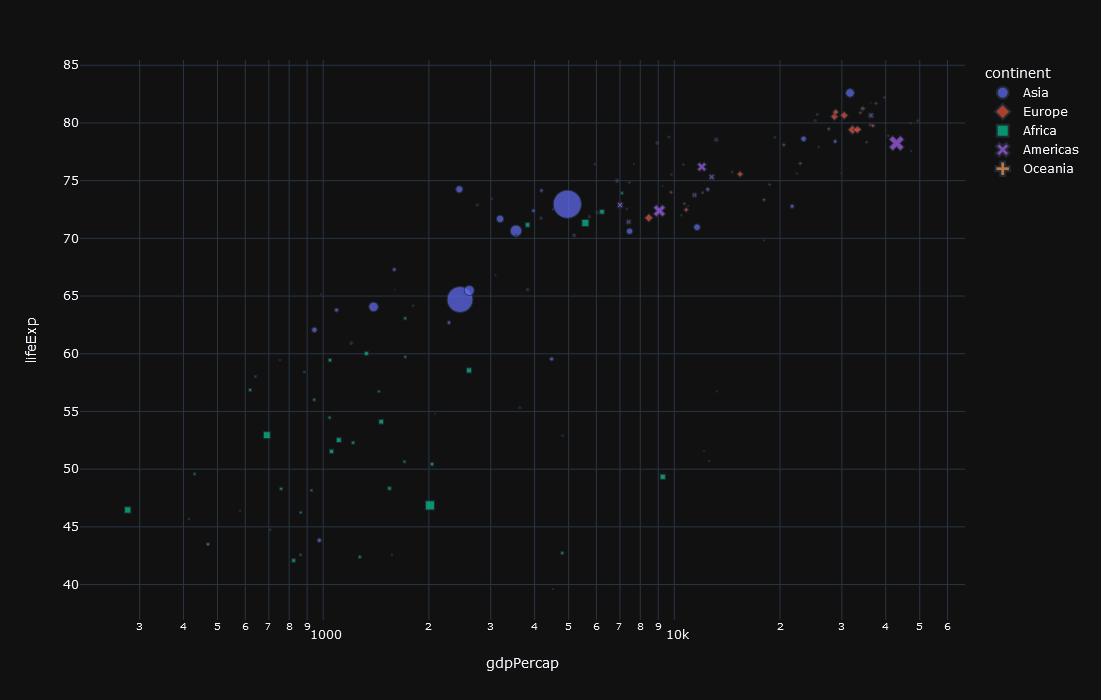

In [5]:
px.scatter(df[df['year'] == 2007], x = 'gdpPercap' , y = 'lifeExp' , size= "pop" , color = 'continent'
           ,log_x = True, hover_name = 'country', template = 'plotly_dark'
           ,width = 900, height = 700, symbol = 'continent')

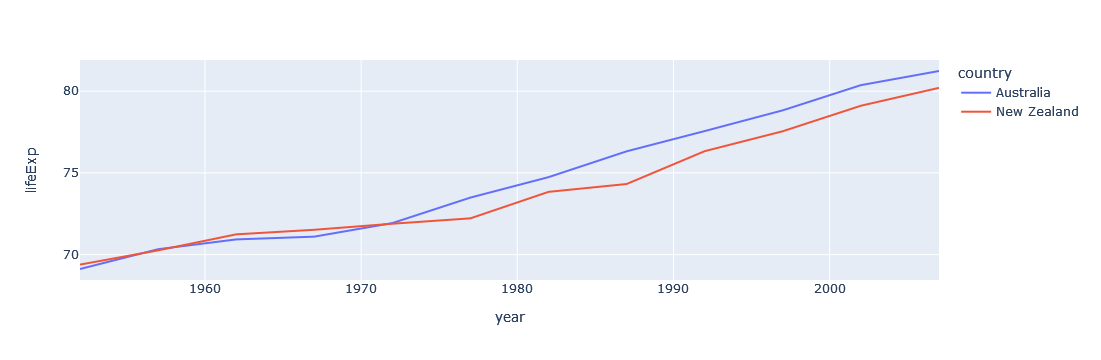

In [6]:
px.line(df[df['continent'] == 'Oceania'], x = 'year' , y = 'lifeExp' , color = 'country')

In [12]:
from dash import Dash, html, dcc , dash_table
import dash_bootstrap_components as dbc

app = Dash(__name__)
app.layout = [
    html.H1(children='Hello Dash'),
    html.Div(children='''My first App with data'''),
    dash_table.DataTable(data = df.to_dict('records'), page_size= 15),
    dcc.Graph(figure=strip_plot),
    dcc.Graph(figure= px.histogram(df, x = 'continent', y = 'lifeExp', histfunc='avg'))
]

if __name__ == "__main__":
    app.run_server(debug=True, port=8000)

Visit http://127.0.0.1:8050/ in your web browser. You should see an app that looks like the one above.

In [7]:
stock_df = px.data.stocks()
stock_df.head()

,date,GOOG,AAPL,AMZN,FB,NFLX,MSFT
0,2018-01-01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2018-01-08,1.018172,1.011943,1.061881,0.959968,1.053526,1.015988
2,2018-01-15,1.032008,1.019771,1.053240,0.970243,1.049860,1.020524
3,2018-01-22,1.066783,0.980057,1.140676,1.016858,1.307681,1.066561
4,2018-01-29,1.008773,0.917143,1.163374,1.018357,1.273537,1.040708


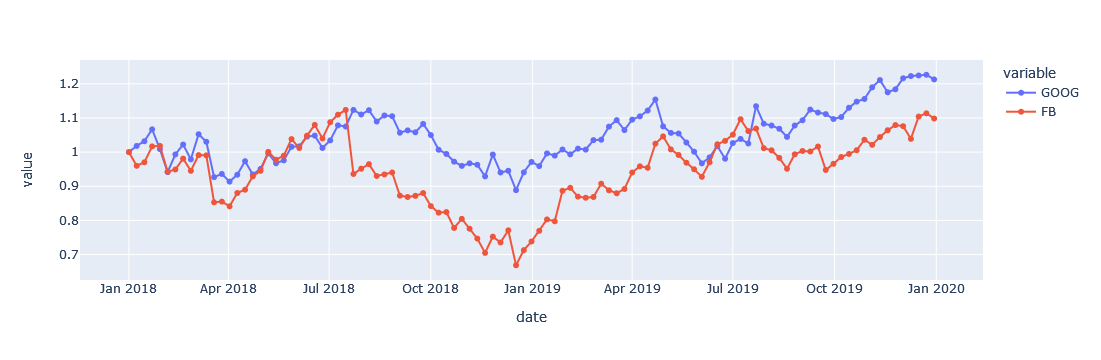

In [8]:
px.line(stock_df, x = 'date' , y = ['GOOG',"FB"], markers='date')

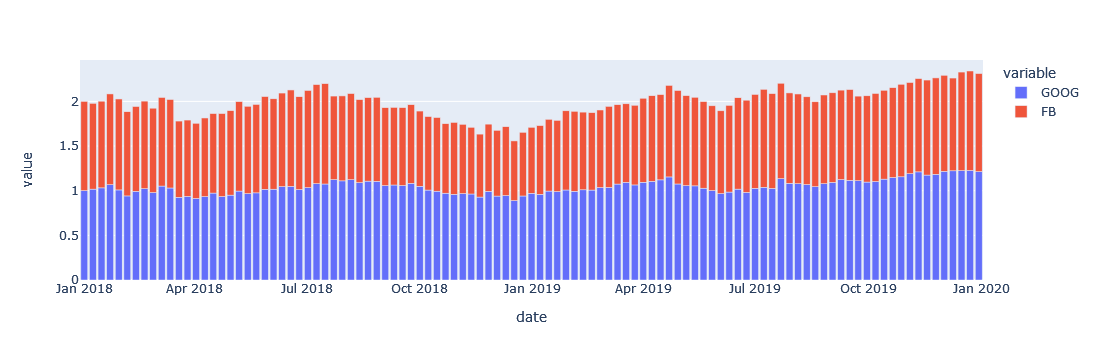

In [9]:
px.bar(stock_df, x = 'date' , y = ['GOOG',"FB"])

In [10]:
tips_df = px.data.tips()
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


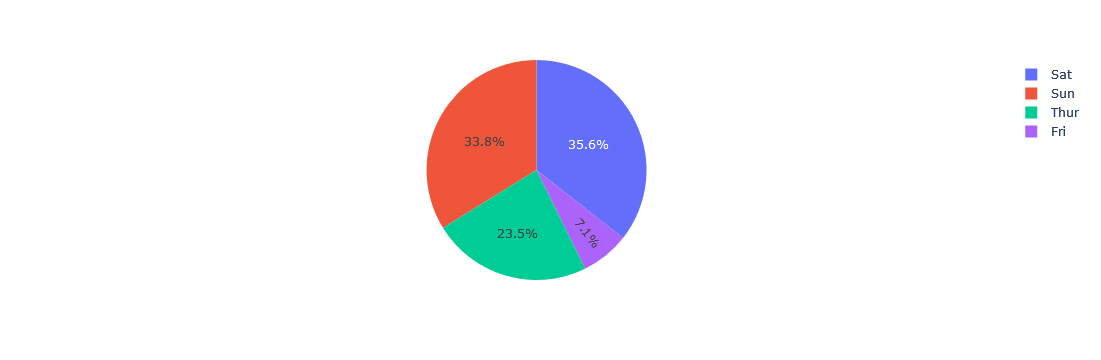

In [11]:
px.pie(tips_df,values='tip', names = 'day')

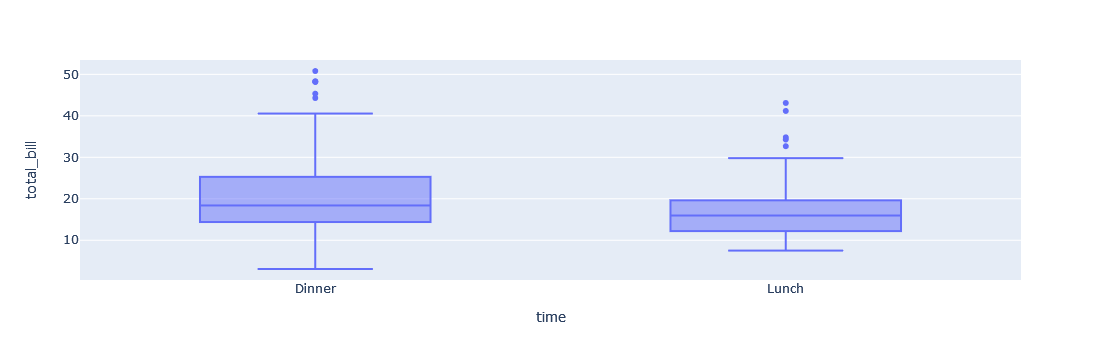

In [12]:
px.box(tips_df, y='total_bill', x='time')

Plotly Express currently includes the following functions:

    Basics: scatter, line, area, bar, funnel, timeline
    Part-of-Whole: pie, sunburst, treemap, icicle, funnel_area
    1D Distributions: histogram, box, violin, strip, ecdf
    2D Distributions: density_heatmap, density_contour
    Matrix or Image Input: imshow
    3-Dimensional: scatter_3d, line_3d
    Multidimensional: scatter_matrix, parallel_coordinates, parallel_categories
    Tile Maps: scatter_mapbox, line_mapbox, choropleth_mapbox, density_mapbox
    Outline Maps: scatter_geo, line_geo, choropleth
    Polar Charts: scatter_polar, line_polar, bar_polar
    Ternary Charts: scatter_ternary, line_ternary


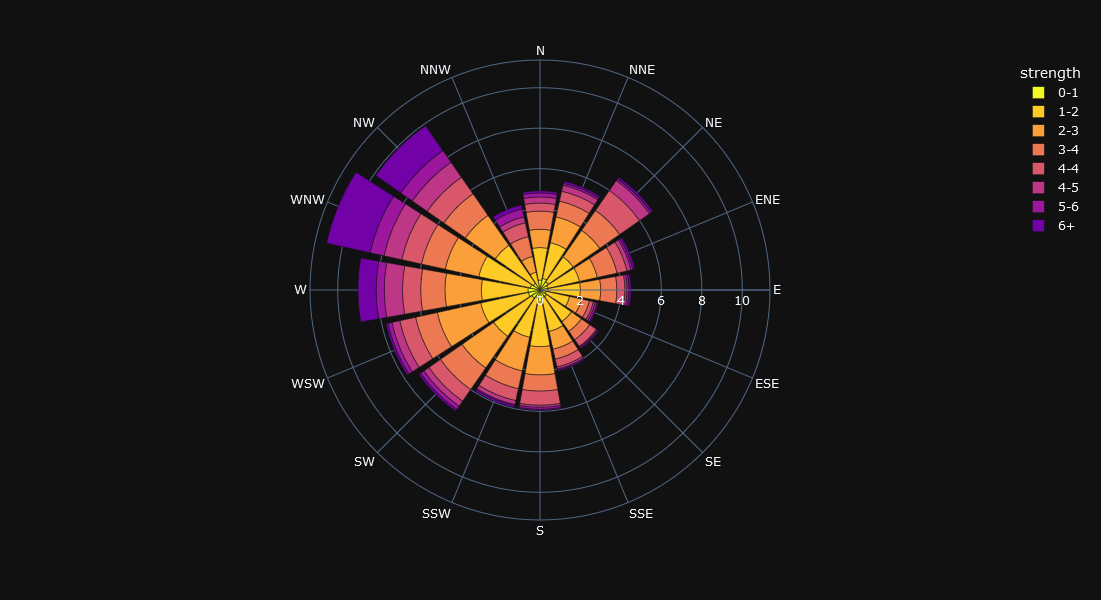

In [13]:
df = px.data.wind()
fig = px.bar_polar(df, r="frequency", theta="direction", height=600,
                   color="strength", template="plotly_dark",
                   color_discrete_sequence= px.colors.sequential.Plasma_r)
fig.show()

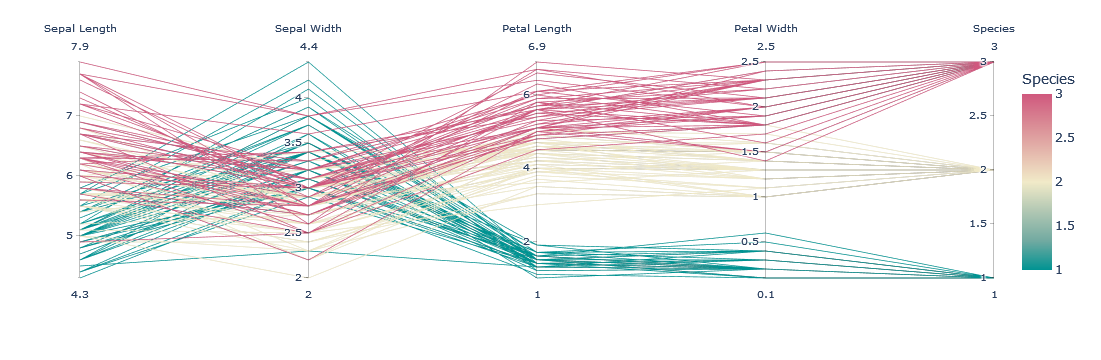

In [14]:
df = px.data.iris()
fig = px.parallel_coordinates(df, color="species_id", labels={"species_id": "Species",
                  "sepal_width": "Sepal Width", "sepal_length": "Sepal Length",
                  "petal_width": "Petal Width", "petal_length": "Petal Length", },
                    color_continuous_scale=px.colors.diverging.Tealrose, color_continuous_midpoint=2)
fig.show()

In [15]:
df = px.data.tips()
fig = px.parallel_categories(df, color="size", color_continuous_scale=px.colors.sequential.Inferno)
fig.show()

In [16]:
df = px.data.election()
fig = px.scatter_ternary(df, a="Joly", b="Coderre", c="Bergeron", color="winner", size="total", hover_name="district",
                   size_max=15, color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"} )
fig.show()

In [17]:
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()

In [3]:
#!pip install -U kaleido

In [19]:
df = px.data.gapminder().query("year == 2007")

fig = px.scatter(df, y="lifeExp", x="gdpPercap", color="continent", log_x=True, size="pop", size_max=60,
                 hover_name="country", height=600, width=1000, template="simple_white", 
                 color_discrete_sequence=px.colors.qualitative.G10,
                 title="Health vs Wealth 2007",
                 labels=dict(
                     continent="Continent", pop="Population",
                     gdpPercap="GDP per Capita (US$, price-adjusted)", 
                     lifeExp="Life Expectancy (years)"))

fig.update_layout(font_family="Rockwell",
                  legend=dict(orientation="h", title="", y=1.1, x=1, xanchor="right", yanchor="bottom"))
fig.update_xaxes(tickprefix="$", range=[2,5], dtick=1)
fig.update_yaxes(range=[30,90])
fig.add_hline((df["lifeExp"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.add_vline((df["gdpPercap"]*df["pop"]).sum()/df["pop"].sum(), line_width=1, line_dash="dot")
fig.show()

fig.write_image("gapminder_2007.svg") # static export
# fig.write_html("gapminder_2007.html") # interactive export
# fig.write_json("gapminder_2007.json") # serialized export

References: 

https://plotly.com/python-api-reference/index.html
